# Luca Corsetti 0001131095

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import ParameterGrid
from sklearn.metrics.cluster import pair_confusion_matrix

%matplotlib inline

random_state=777

np.random.seed(random_state)

1. Load the data, the attributes are all qualitative and there is no label column, show the shape of the data and for each column show the frequencies of each distinct value (hint: you can use the
numpy function unique(x, return_counts = True)
2. Do the appropriate pre-processing in order to use the sklearn algorithms on this dataset; the values are qualitative and must be considered as nomina!
3. As an external background knowledge, we are told that for this dataset a requirement for a good clustering scheme is to have clusters with low deviation in sizes, e.g. a scheme with cluster sizes (330, 670) is less acceptable than one with (333, 333, 334).\
In order to obtain this, we want to compute, for each clustering scheme with _clusters clusters and represented by the labels in y, a size deviation index with the formula\
**np.sqrt(np.unique(y, return_counts = True)[1].var())/n_clusters**\
For varying number of clusters fit KMeans and compute the inertia, the silhouette index and the above-mentioned size deviation index.
4. In this dataset the elbow method will show an almost "vanishing" elbow for inertia, and the silhouette is totally non-effective. Make two plots, one with inertia and silhouette, another with inertia and size deviation index, then decide the best number of clusters and refit KMeans using that value
5. Fit another clustering method of your choice, trying to reproduce the same number of clusters you have chosen in the previous step
6. Compare the results of the two clustering showing the result
of sklearn.metrics.cluster.pair_confusion_matrix and sklearn.metrics.adjusted_rand_score

### 1. Load the data, the attributes are all qualitative and there is no label column, show the shape of the data and for each column show the frequencies of each distinct value

(hint: you can use the numpy function unique(x, return_counts = True)

In [7]:
df = pd.read_csv('./exam_2021_02_17_data.csv', sep='\t')

print(f"the dataset has {df.shape[0]} rows and {df.shape[1]} columns")

the dataset has 1000 rows and 3 columns


In [10]:
df.head()

,F0,F1,F2
0,d,a,a
1,c,e,c
2,j,a,c
3,f,e,j
4,c,e,d


In [19]:
counts = np.unique(df, return_counts=True)

frequencies = pd.DataFrame(counts[1:], columns=counts[0], index=['frequencies'])

frequencies

,a,b,c,d,e,f,g,h,i,j
frequencies,300,298,300,300,302,300,300,300,300,300


### 2. Do the appropriate pre-processing in order to use the sklearn algorithms on this dataset; the values are qualitative and must be considered as nominal

we will use OneHotEncoder, such that every label gets transformed into a [False|True] array

In [85]:
encoder = OneHotEncoder(dtype=np.int32, sparse_output=False, handle_unknown='ignore')

encoded_data = encoder.fit_transform(df)

X = pd.DataFrame(encoded_data)

X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### 3. As an external background knowledge, we are told that for this dataset a requirement for a good clustering scheme is to have clusters with low deviation in sizes, e.g. a scheme with cluster sizes (330, 670) is less acceptable than one with (333, 333, 334).\
In order to obtain this, we want to compute, for each clustering scheme with n_clusters clusters and represented by the labels in y, a size deviation index with the formula\
**np.sqrt(np.unique(y, return_counts = True)[1].var())/n_clusters**\
For varying number of clusters fit KMeans and compute the inertia, the silhouette index and the above-mentioned size deviation index.

we will proceed by clustering the data using various k, storing the result of each in a dataframe for later easy retrival

In [87]:
k_range = range(2, 11)

results = pd.DataFrame(columns=['k', 'inertia', 'silhouette_index', 'deviation_index'])

for k in k_range:
    print(f"fitting k={k}")

    km = KMeans(n_clusters=k, random_state=random_state)
    
    y_km = km.fit_predict(X)
    s_score = silhouette_score(X, y_km)
    d_index = np.sqrt(np.unique(y_km, return_counts=True)[1].var()) / k
    
    results.loc[len(results)] = [k, km.inertia_, s_score, d_index]

results.head()

fitting k=2
fitting k=3
fitting k=4
fitting k=5
fitting k=6
fitting k=7
fitting k=8
fitting k=9
fitting k=10


,k,inertia,silhouette_index,deviation_index
0,2.0,2544.047450,0.064529,88.500000
1,3.0,2326.329233,0.105176,0.314270
2,4.0,2276.492339,0.093858,19.254058
3,5.0,2177.144476,0.099177,15.159420
4,6.0,2099.341795,0.109804,9.131583


### 4. In this dataset the elbow method will show an almost "vanishing" elbow for inertia, and the silhouette is totally non-effective. Make two plots, one with inertia and silhouette, another with inertia and size deviation index, then decide the best number of clusters and refit KMeans using that value

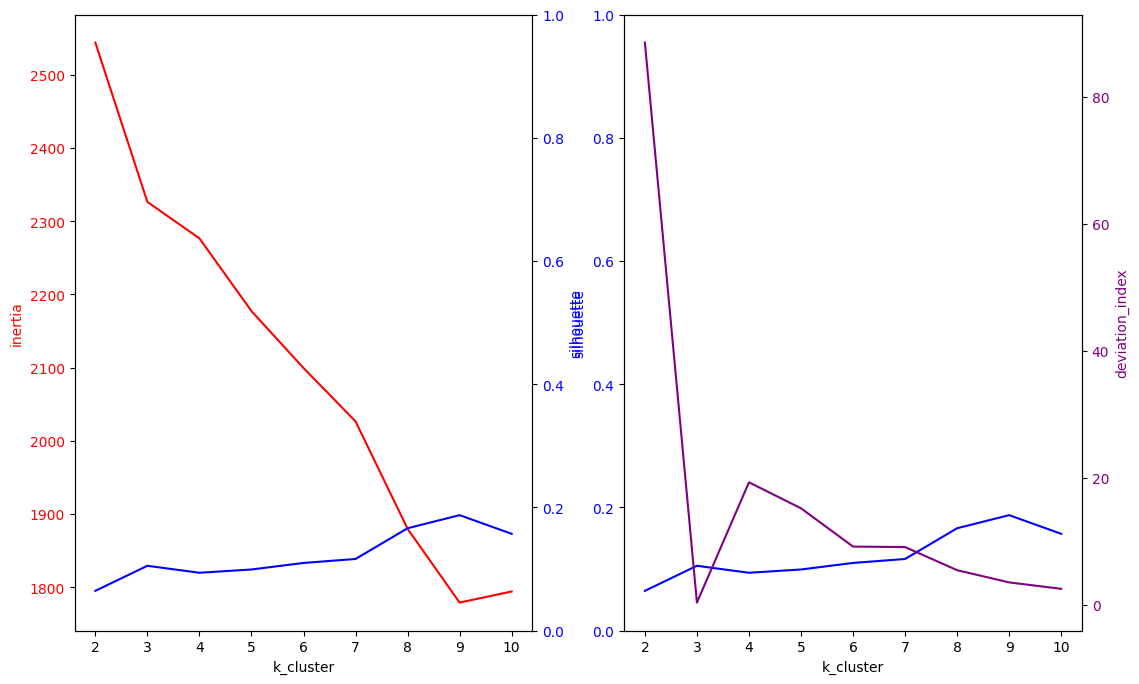

In [89]:
fig, (plot1, plot2) = plt.subplots(figsize=(13, 8), nrows=1, ncols=2)

plot1.set_xlabel('k_cluster')
plot2.set_xlabel('k_cluster')

plot1.set_ylabel('inertia', color='red')
plot1.plot(results['k'], results['inertia'], color='red')
plot1.tick_params(axis='y', labelcolor='red')

silhouette_plt = plot1.twinx()
silhouette_plt.set_ylabel('silhouette', color='blue')
silhouette_plt.plot(results['k'], results['silhouette_index'], color='blue')
silhouette_plt.tick_params(axis='y', labelcolor='blue')
silhouette_plt.set_ylim(0, 1)

plot2.set_ylabel('silhouette', color='blue')
plot2.plot(results['k'], results['silhouette_index'], color='blue')
plot2.tick_params(axis='y', labelcolor='blue')
plot2.set_ylim(0, 1)

silhouette_plt = plot2.twinx()
silhouette_plt.set_ylabel('deviation_index', color='purple')
silhouette_plt.plot(results['k'], results['deviation_index'], color='purple')
silhouette_plt.tick_params(axis='y', labelcolor='purple')

plt.show()

since our goal is to minimize the deviation_index we are going to be choosing k=3 as it seems to be the lowest one.

In [91]:
best_k = 3

### 5. Fit another clustering method of your choice, trying to reproduce the same number of clusters you have chosen in the previous step

for this task, we're going to use AgglomerativeClustering algorithm

In [115]:
results_db = pd.DataFrame(columns=['k', 'eps', 'min_samples', 'silhouette_index', 'deviation_index'])
params = {'eps': list(range(1, 30)), 'min_samples': list(range(50, 300, 5))}
grid = list(ParameterGrid(params))
    
for i in range(len(grid)):
    db = DBSCAN(**grid[i])
    y_db = db.fit_predict(X)

    labels_all = np.unique(y_db)
    labels = labels_all[labels_all != -1]
    n_clusters = len(labels)
    
    if n_clusters <= 1:
        continue
    
    s_score = silhouette_score(X, y_db)
    d_index = np.sqrt(np.unique(y_db, return_counts=True)[1].var()) / n_clusters
    
    results_db.loc[len(results_db)] = [n_clusters, db.eps, db.min_samples, s_score, d_index]

results_db.head()

,k,eps,min_samples,silhouette_index,deviation_index
0,2.0,2.0,280.0,0.040009,50.316222


by trying with a bunch of parameters over DBSCAN, we were only able to find a single result with > 1 clusters with a high deviation_index of ~50

### 6. Compare the results of the two clustering showing the result of sklearn.metrics.cluster.pair_confusion_matrix and sklearn.metrics.adjusted_rand_score

before comparing the two clustering methods, we will refit the algorithms with the best results we previously found

In [118]:
km = KMeans(n_clusters=best_k)
y_km = km.fit_predict(X)

db = DBSCAN(eps=2.0, min_samples=280)
y_db = db.fit_predict(X)

once we have the predicted labels we can visualize the rand_score

In [121]:
rand_score = adjusted_rand_score(y_km, y_db)

rand_score

0.07066509472910891

since the rand metric is pretty low, it means that the 2 predicted labels collection are quite different. we could've expected this behaviour since KMeans was fitted with k=3, while DBMeans with k=2.

In [124]:
pair_confusion_matrix(y_km, y_db)

array([[439384, 225270],
       [196902, 137444]])

the confusion matrix

[
    TP, FN,
    FP, TN
]

-	True Positives (TP): Pairs of points that are in the same cluster in both labels_true and labels_pred.
-	False Negatives (FN): Pairs of points that are in the same cluster in labels_true but in different clusters in labels_pred.
-	False Positives (FP): Pairs of points that are in the same cluster in labels_pred but in different clusters in labels_true.
-	True Negatives (TN): Pairs of points that are in different clusters in both labels_true and labels_pred.